# Milestone 4 EDA  

Goals:
- load structured data 
- load image data

## Exploring structured data

In [3]:
import pandas as pd
import numpy as np

Training data includes filenames of photos along with the correct headcount in "train" dataframe and in the "bbox_train" dataframe there is the filename along with the image size (width, heigth) along with 4 limits representing the bounding box for a face, there is a row for each individual face. 

In [4]:
data_table = pd.read_csv("data/structured data/headcount-table.csv")
print(data_table.info())
data_table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5733 entries, 0 to 5732
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       5733 non-null   object
 1   HeadCount  5733 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.7+ KB
None


,Name,HeadCount
0,10001.jpg,4
1,10002.jpg,4
2,10003.jpg,2
3,10004.jpg,3
4,10006.jpg,4


In [5]:
bbox_table = pd.read_csv("data/structured data/bbox_table.csv")
print(bbox_table.info())
print('--------------------------------------')
print("Unique photos: ",len(bbox_table['Name'].unique()))
print('--------------------------------------')
bbox_table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24533 entries, 0 to 24532
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    24533 non-null  object
 1   width   24533 non-null  int64 
 2   height  24533 non-null  int64 
 3   xmin    24533 non-null  int64 
 4   ymin    24533 non-null  int64 
 5   xmax    24533 non-null  int64 
 6   ymax    24533 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.3+ MB
None
--------------------------------------
Unique photos:  5733
--------------------------------------


,Name,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,612,408,192,199,230,235
1,10001.jpg,612,408,247,168,291,211
2,10001.jpg,612,408,321,176,366,222
3,10001.jpg,612,408,355,183,387,214
4,10002.jpg,612,408,339,165,378,202


### Plotting head count distribution

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

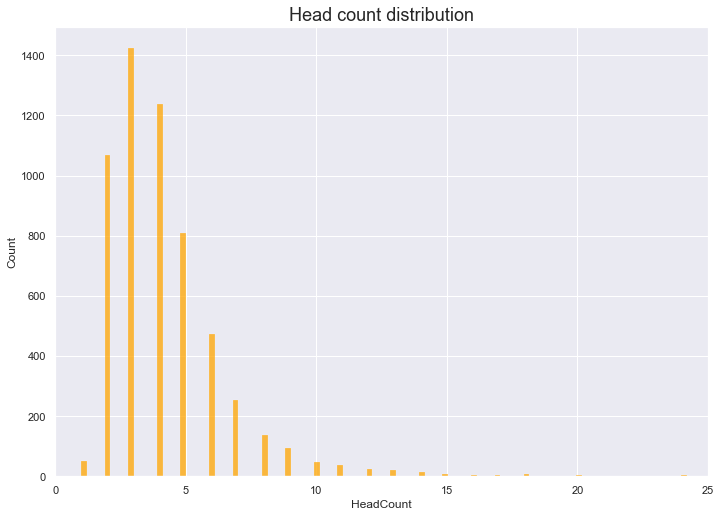

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# g = sns.histplot(data=data_table["HeadCount"])
# g.set(xlim=(0,25))

h = sns.histplot(data=data_table["HeadCount"],color='orange')
h.set(xlim=(0,25))

plt.title("Head count distribution",fontdict={'fontsize':18})
# plt.legend(['Train'])
plt.show()

## Loading and displaying image data

In [8]:
import PIL
from PIL import Image, ImageDraw
import tensorflow as tf
from tensorflow import keras

In [9]:
bbox_table.head()

,Name,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,612,408,192,199,230,235
1,10001.jpg,612,408,247,168,291,211
2,10001.jpg,612,408,321,176,366,222
3,10001.jpg,612,408,355,183,387,214
4,10002.jpg,612,408,339,165,378,202


In [12]:
# display an image
path = "data/train/10002.jpg"
w,h = list(bbox_table.loc[bbox_table["Name"]=='10002.jpg']['width'])[0],list(bbox_table.loc[bbox_table["Name"]=='10002.jpg']['height'])[0]

im = Image.open(path)
im.show()


In [13]:
# display a group of bounding boxes
box_table = bbox_table.loc[bbox_table.Name=="10002.jpg"]
w,h = box_table.width.iloc[0],box_table.height.iloc[0]

with Image.new("RGB",(w,h)) as img: 

    for row in box_table.iterrows():
        shape = [row[1].xmin,row[1].ymin,row[1].xmax,row[1].ymax]
        bbox = ImageDraw.Draw(img)
        bbox.rectangle(shape,outline='red')

    img.show()


In [15]:
# draw bounding boxes on a photo to display
path = "data/train/10002.jpg"
box_table = bbox_table.loc[bbox_table.Name=="10002.jpg"]
w,h = box_table.width.iloc[0],box_table.height.iloc[0]

with Image.open(path) as img: 

    for row in box_table.iterrows():
        shape = [row[1].xmin,row[1].ymin,row[1].xmax,row[1].ymax]
        bbox = ImageDraw.Draw(img)
        bbox.rectangle(shape,outline='red')

    img.show()


In [10]:
# Formalize the above cell as a function

def show_photo(num:int):
    try:
        if len(str(num)) == 5:
            path = f"data/train/{str(num)}.jpg"
            box_table = bbox_table.loc[bbox_table.Name==path[-9:]]
            w,h = box_table.width.iloc[0],box_table.height.iloc[0]
            with Image.open(path) as img: 
                for row in box_table.iterrows():
                    shape = [row[1].xmin,row[1].ymin,row[1].xmax,row[1].ymax]
                    bbox = ImageDraw.Draw(img)
                    bbox.rectangle(shape,outline='red')
            return img.show(),print(path),box_table
        
        else:
            return print("invaled number")
            
    except IndexError:
        print('photo not available in data set')

In [19]:
show_photo(10001)

data/train/10001.jpg


(None,
 None,
         Name  width  height  xmin  ymin  xmax  ymax
 0  10001.jpg    612     408   192   199   230   235
 1  10001.jpg    612     408   247   168   291   211
 2  10001.jpg    612     408   321   176   366   222
 3  10001.jpg    612     408   355   183   387   214)

## organizing dataset subdirectory structure

In [11]:
import os
from shutil import move
from sklearn.model_selection import train_test_split

Train test split

In [18]:
train,test = train_test_split(data_table.Name, test_size=0.25,random_state=42)
parent_dir = os.listdir("data/parent/")

In [36]:
parent_dir = "data/parent/"
train_dir = "data/train/"
test_dir = "data/test/"



In [39]:

try:
    for file_name in train:
        src = parent_dir+file_name
        dest = train_dir+file_name
        move(src,dest)

except FileNotFoundError:
    pass


try:
    for file_name in test:
            src = parent_dir+file_name
            dest = test_dir+file_name
            move(src,dest)
except FileNotFoundError:
    pass



In [22]:
classes = data_table.HeadCount.unique()
classes

array([ 4,  2,  3,  6,  7,  8,  5, 11,  1,  9, 10, 21, 13, 14, 15, 17, 12,
       20, 16, 18, 31, 23, 24, 77, 28, 22, 19, 25, 29], dtype=int64)

In [12]:
parent_dir = 'data/image_data/train/'
paths = []
for cat in classes:
    path = os.path.join(parent_dir, str(cat))
    paths.append(path)

ticker = 0 
for path in paths:
    os.mkdir(path)
    ticker += 1

print(ticker)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data/image_data/train/4'

In [13]:
data_table.head()

,Name,HeadCount
0,10001.jpg,4
1,10002.jpg,4
2,10003.jpg,2
3,10004.jpg,3
4,10006.jpg,4


In [47]:
source_dir = 'data/image_data/train/'

for row in data_table.iterrows():
    jpg = row[1].Name
    headcount = row[1].HeadCount

    source = f'data/image_data/train/{jpg}'
    destination = f'data/image_data/train/{headcount}/{jpg}'
    
    move(source,destination)
    

## Loading image data with Keras

In [18]:
head_count_labels = list(data_table.HeadCount)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='data/image_data/train',
    labels='inferred',
    label_mode='int',
    validation_split=0.25,
    subset='training',
    batch_size=32,
    image_size=(408, 612),
    seed=42)

Found 5733 files belonging to 29 classes.
Using 4300 files for training.


In [19]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='data/image_data/train',
    labels='inferred',
    label_mode='int',
    validation_split=0.25,
    subset='validation',
    batch_size=32,
    image_size=(408, 612),
    seed=42)

Found 5733 files belonging to 29 classes.
Using 1433 files for validation.


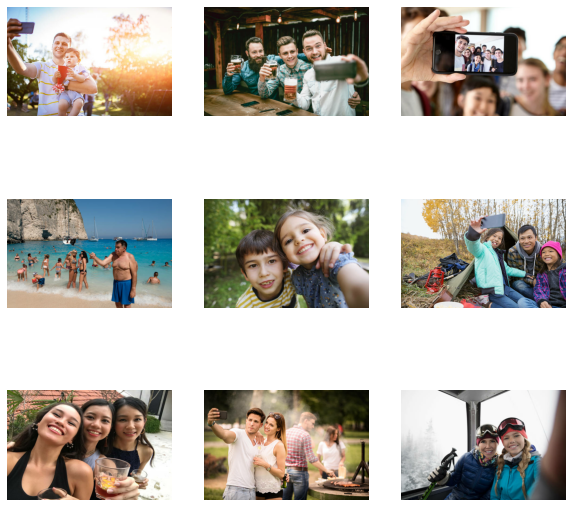

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
for images, labels in image_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    # plt.title(class_names[labels[i]])
    plt.axis("off")